# Isabella Mendoza

## Research question/interests

I'm interested in the possible correlation between medical expenses seen in children vs. adults. By comparing the two, I'll be able to see which age group and range experiences more severe health issues as it correlates to the expenses. I'd also like to look at how this correlates to an individual's BMI as well as see the relationship between BMI and age.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../data/raw/insurance/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Milestone 3
## Task 1: EDA

To start, I'll look at the general trends in the overall dataframe. Then, I can narrow it down to the useful columns.

In [6]:
df.shape

(1338, 7)

In [7]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Knowing how many unique values there are will give me a general idea of the age and BMI range. I will not be needing the region columns as it is irrelevant to my chosen research questions.
I'm primarily interested in the age, BMI, and charges columns.

Text(0.5, 1.0, 'Correlation strength between all columns')

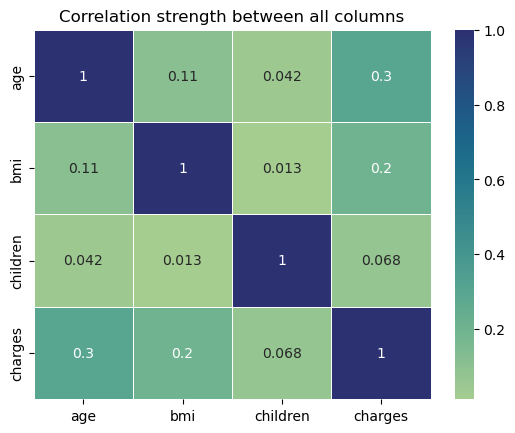

In [10]:
df_mx = df.corr()
sns.heatmap(df_mx, annot=True, linewidth = 0.5, cmap = "crest")
plt.title("Correlation strength between all columns")

This heatmap shows that there is a strong relation between age and charges which is what I am focusing on. There is also an evident correlation between BMI and charges.

Knowing this, I can plot focus on the desired columns. However, there is also a relationship between BMI and age which would give insight on possible causes for such high expenses.

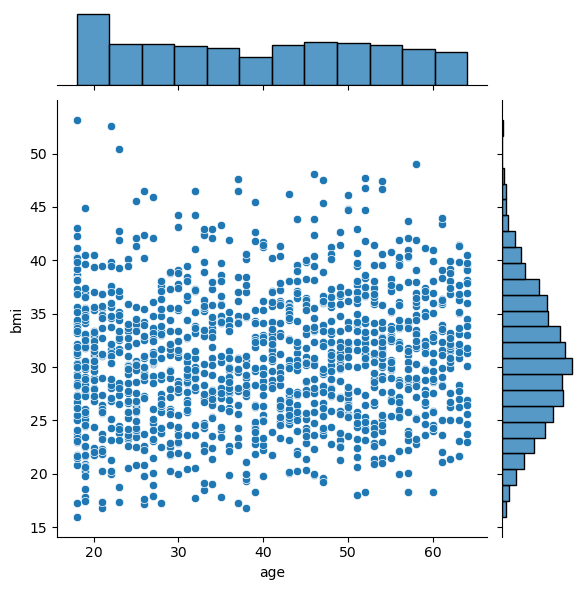

In [11]:
sns.jointplot(x = 'age', y = 'bmi', data = df)

The plots indicate that there is no age that has a signifcantly different higher or lower average BMI compared to other age groups. However, since the bars at the top are relatively even, all age ranges have equal amounts of recorded data.

Now I can analyze the range of expenses on its own to see which amounts are more common. I can then compare the common expense range to common age range.

Text(0.5, 0, 'Magnitude of Medical Charges')

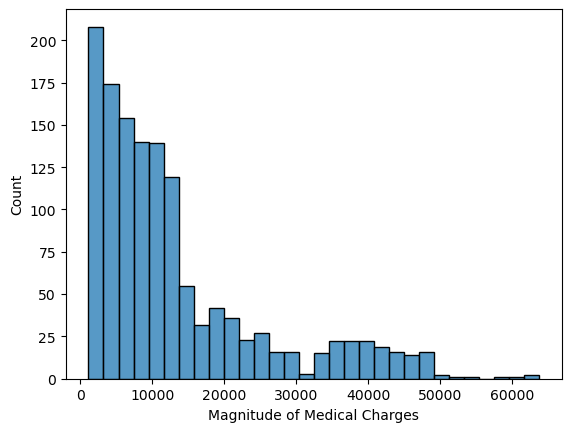

In [12]:
sns.histplot((df['charges']), bins=30)
plt.xlabel("Magnitude of Medical Charges")

This histogram of the overall medical charges clearly shows that the majority of patients are charged between 0 to 10 000USD. As the expenses gets higher, the number of people charged that amount become lower.

The minimum charge is around 1000 USD with the maximum charge recorded being just over 60000 USD.

Next, I can look at the most common age range.

Text(0.5, 0, 'Magnitude of Ages')

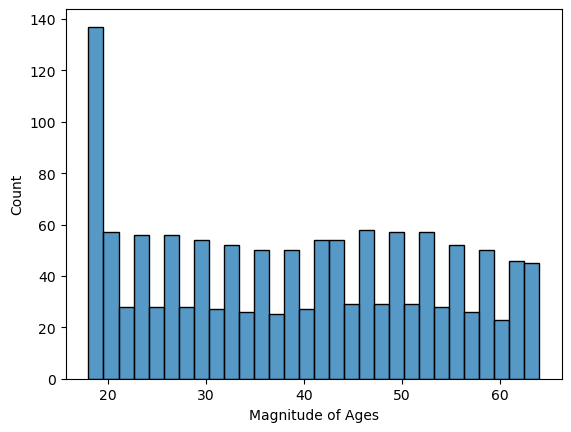

In [13]:
sns.histplot((df['age']), bins=30)
plt.xlabel("Magnitude of Ages")

Seeing this, the most common age is just under 20. It looks like most of the patients were at even numbered ages.

I now have a good grasp on the different trends in our dataset, specifically, the ones that I am interested in.

# Task 2: Data Analysis Pipeline

Step 1: Load Data (Part of EDA)
<br />
Step 2: Clean and Revise Data
- After looking at the different trends in Task 1, I know which trends and columns I'd like to focus on. Therefore, I can remove irrelevant ones like region, children, and sex.

In [16]:
df = pd.read_csv("../data/raw/insurance/insurance.csv")
dfClean = df.copy().drop(['region','children', 'sex'], axis=1).dropna(axis=0)
dfClean.reset_index()
dfClean.head()
dfClean

,age,bmi,smoker,charges
0,19,27.900,yes,16884.92400
1,18,33.770,no,1725.55230
2,28,33.000,no,4449.46200
3,33,22.705,no,21984.47061
4,32,28.880,no,3866.85520
...,...,...,...,...
1333,50,30.970,no,10600.54830
1334,18,31.920,no,2205.98080
1335,18,36.850,no,1629.83350
1336,21,25.800,no,2007.94500


To make the data simpler and easier to compare, I'll change the smoker column to 1 or 2 for yes or no respectively.

In [17]:
dfClean['smoker'] = dfClean['smoker'].map({'yes': 1, 'no': 0})
dfClean

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,0,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


Furthermore, I can round my charges so that the values are more realistic in terms of money as well as round the bmi. This makes both values easier to manage.

In [23]:
dfClean['bmi'] = dfClean['bmi'].round(decimals = 2)
dfClean['charges'] = dfClean['charges'].round(decimals = 2)
dfClean


,age,bmi,smoker,charges
0,19,27.90,1,16884.92
1,18,33.77,0,1725.55
2,28,33.00,0,4449.46
3,33,22.70,0,21984.47
4,32,28.88,0,3866.86
...,...,...,...,...
1333,50,30.97,0,10600.55
1334,18,31.92,0,2205.98
1335,18,36.85,0,1629.83
1336,21,25.80,0,2007.94


# Task 3: Method Chaining

In this task, I will combine the steps I used to get my desired dataframe into a separate function in a new .py file. This will keep the processing and cleaning of the dataframe fast and easy.

In [31]:
"""
BEFORE GROUPING AS FUNCTIONS AND COPYING TO NEW PY FILE
def load_and_process("../data/raw/insurance/insurance.csv"):
    
    df = pd.read_csv("../data/raw/insurance/insurance.csv")
    dfClean = (df.copy()
                .drop(['region','children', 'sex'], axis=1)
                .dropna(axis=0)
          )
    dfClean['smoker'] = dfClean['smoker'].map({'yes': 1, 'no': 0})
    dfClean['bmi'] = dfClean['bmi'].round(decimals = 2)
    dfClean['charges'] = dfClean['charges'].round(decimals = 2)
    
    return dfClean
"""
import project_functions2 as p2

In [32]:
cleanData = p2.load_and_process("../data/raw/insurance/insurance.csv")
cleanData

,age,bmi,smoker,charges
0,19,27.90,1,16884.92
1,18,33.77,0,1725.55
2,28,33.00,0,4449.46
3,33,22.70,0,21984.47
4,32,28.88,0,3866.86
...,...,...,...,...
1333,50,30.97,0,10600.55
1334,18,31.92,0,2205.98
1335,18,36.85,0,1629.83
1336,21,25.80,0,2007.94


# Task 4: Data Analysis